In [1]:
import glob
import gc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams
from IPython.display import display

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, shaderdots,\
    quantile_bins, experiment_quantiles

from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
n_chunks = 1
experiments = pd.concat(
    [pd.read_pickle(f'experiments/wide-20shuffle-3seed-fullexperiments{n:03d}.pkl') for n in range(n_chunks)],
    ignore_index=True,
    sort=True)\
.groupby('experiment_id').first().reset_index()
folds = pd.concat(
    [pd.read_pickle(f'experiments/wide-20shuffle-3seed-fulliterations{n:03d}.pkl') for n in range(n_chunks)],
    ignore_index=True,
    sort=True)
folds['split'] = pd.Categorical(folds.split)
cv_folds = folds.query('split != -1').reset_index(drop=True)
whole_folds = folds.query('split == -1').reset_index(drop=True)
del folds
gc.collect()

35

In [5]:
best_iterations = cv_folds.sort_values('dev_auc').groupby(['experiment_id', 'param_seed', 'split']).last()

In [6]:
best_iterations = best_iterations[best_iterations.dev_auc > 0.75]

In [7]:
wide_iterations = best_iterations.groupby(['experiment_id', 'param_seed'])\
    .iteration.agg(np.ptp)\
    .sort_values().index[-10:]

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
pd.DataFrame.plot?

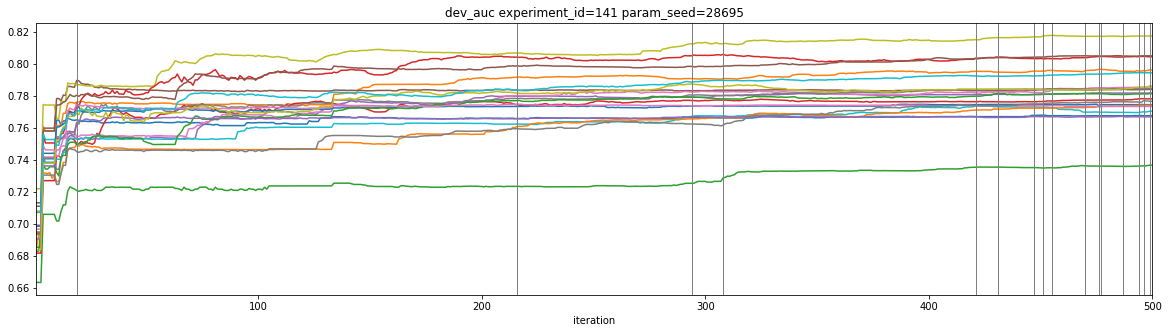

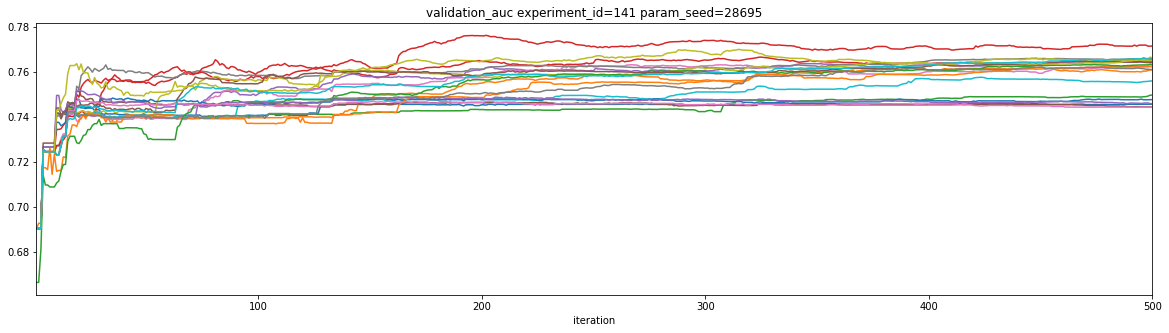

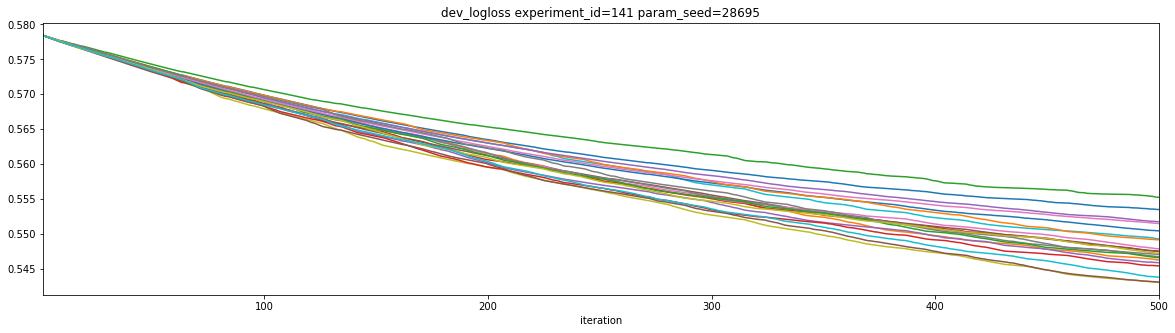

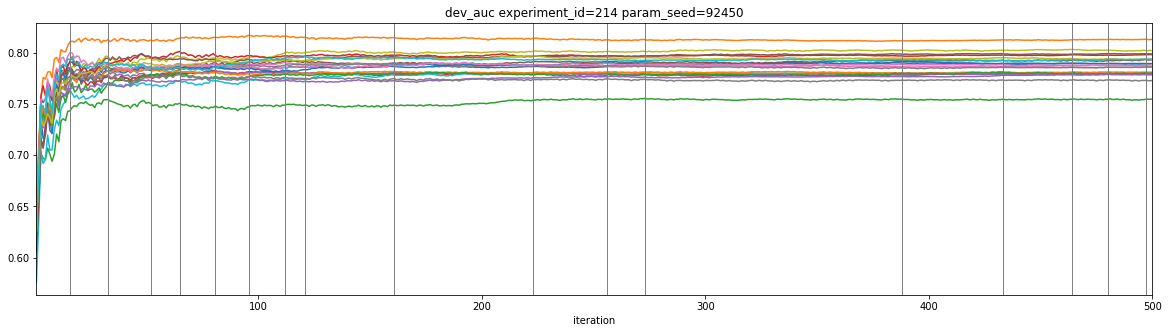

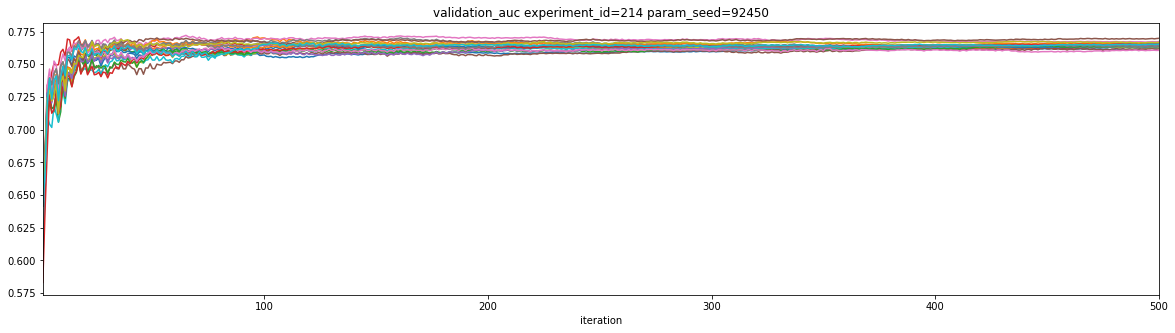

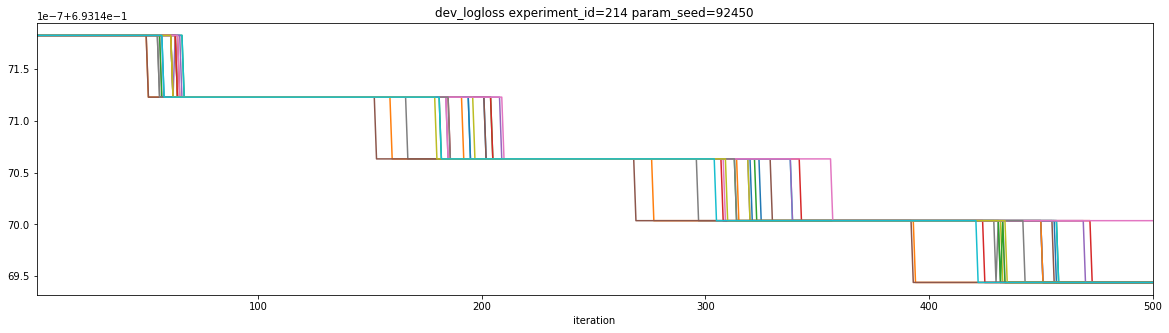

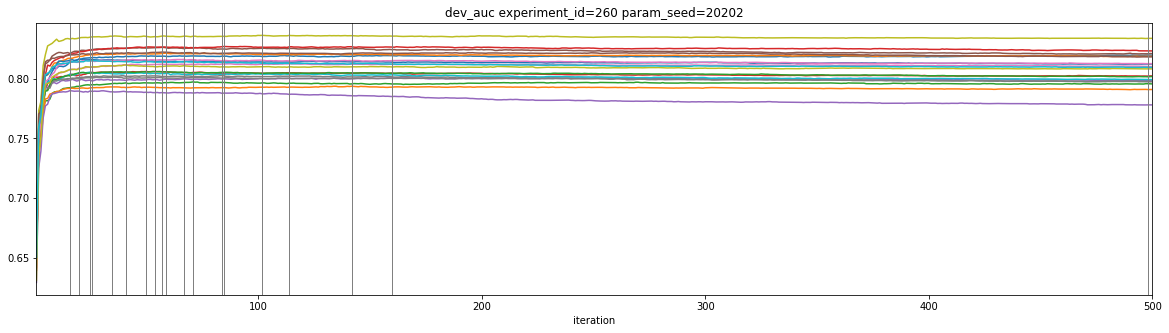

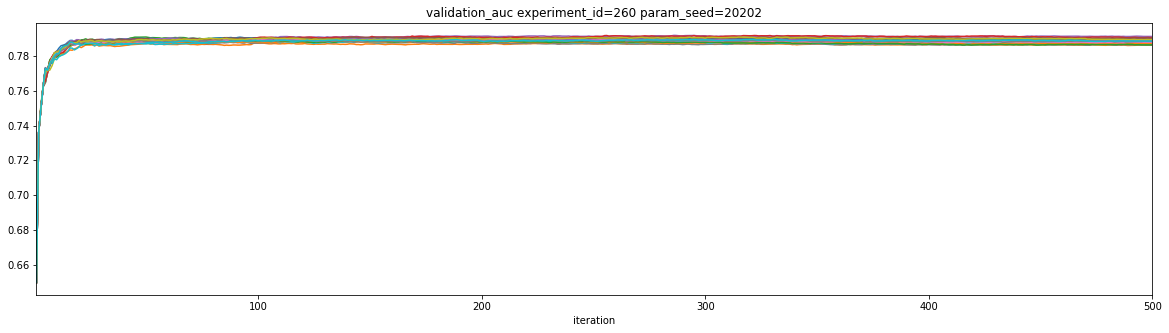

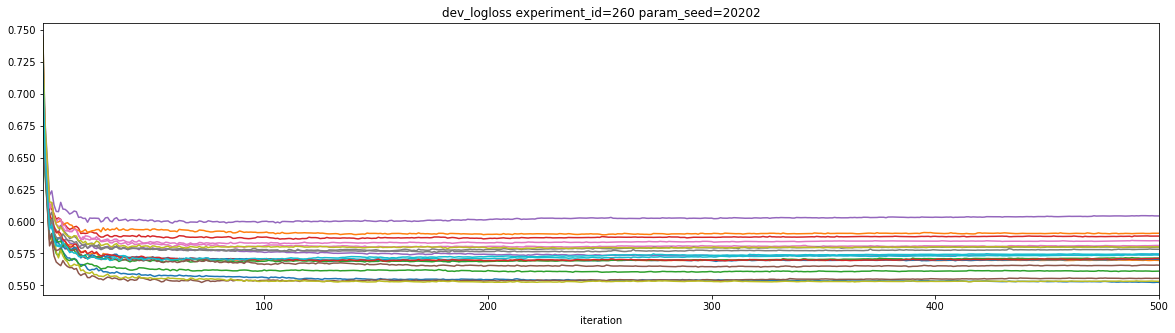

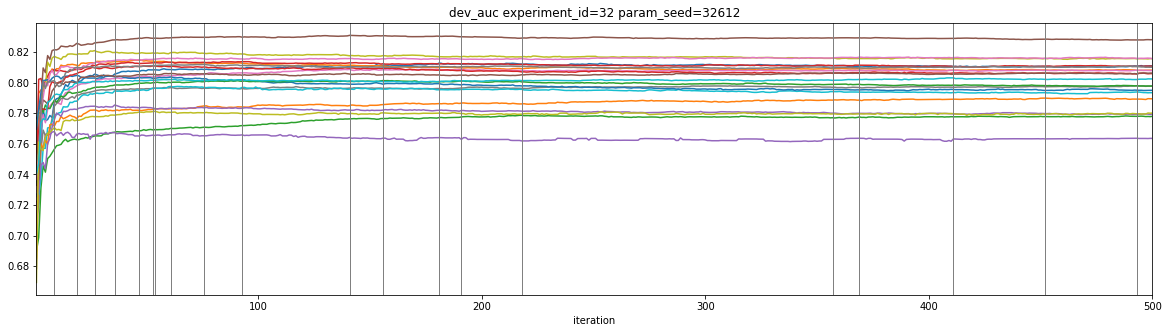

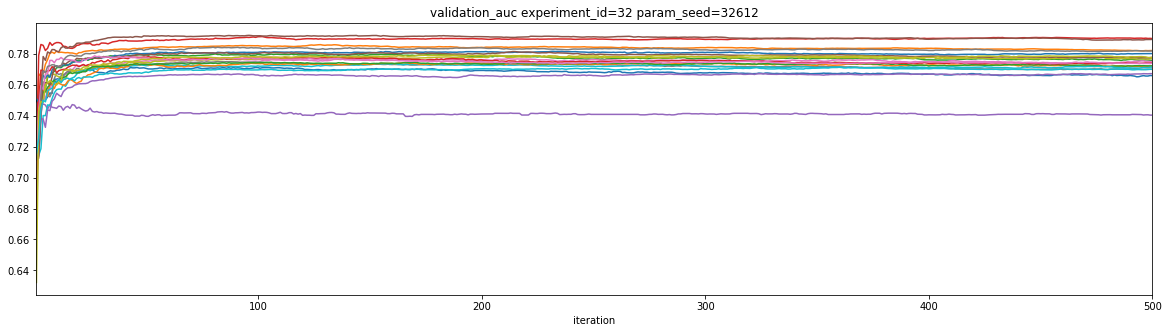

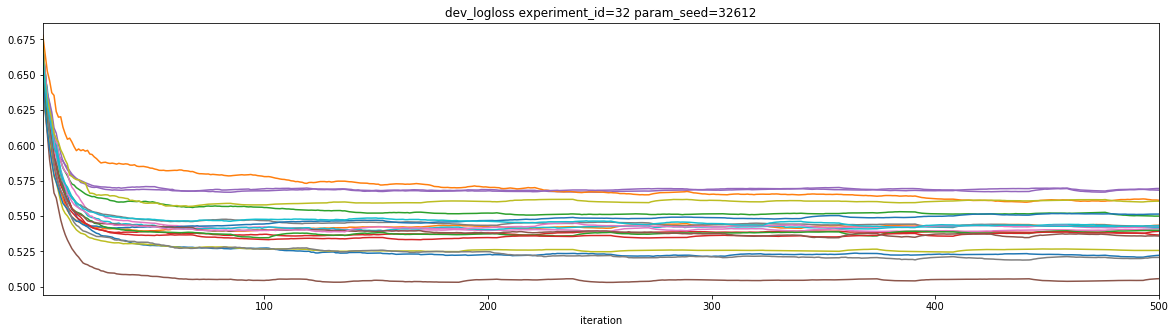

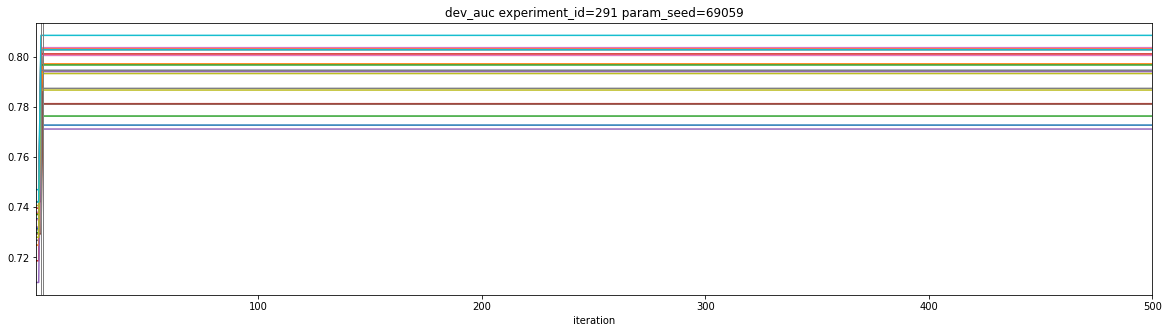

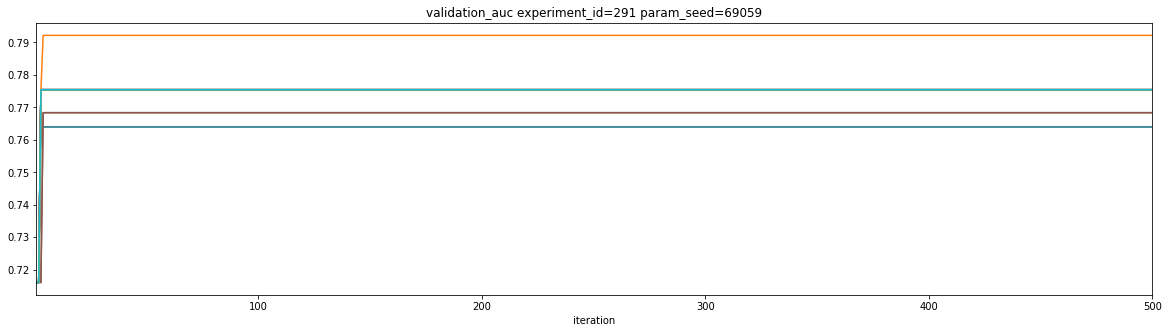

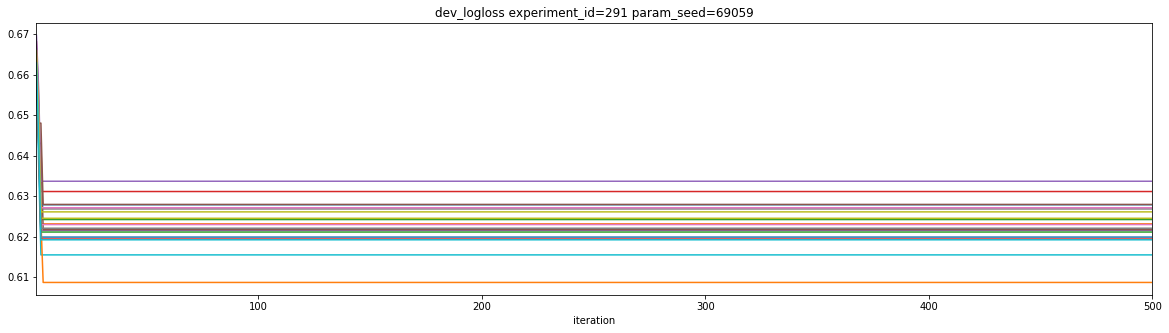

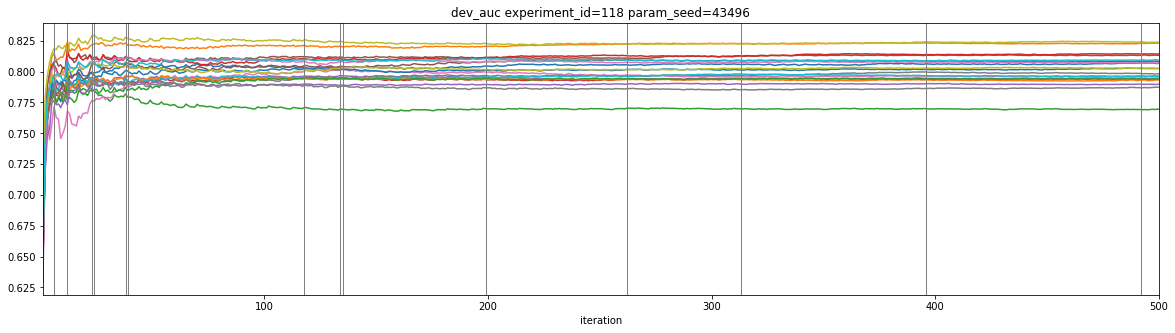

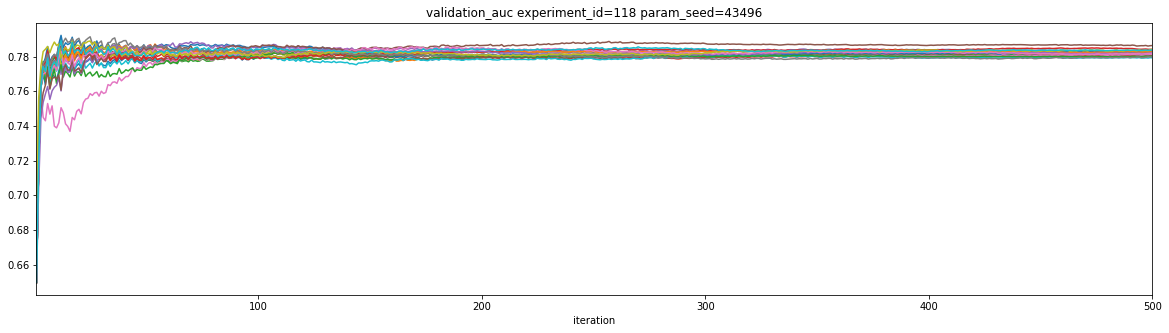

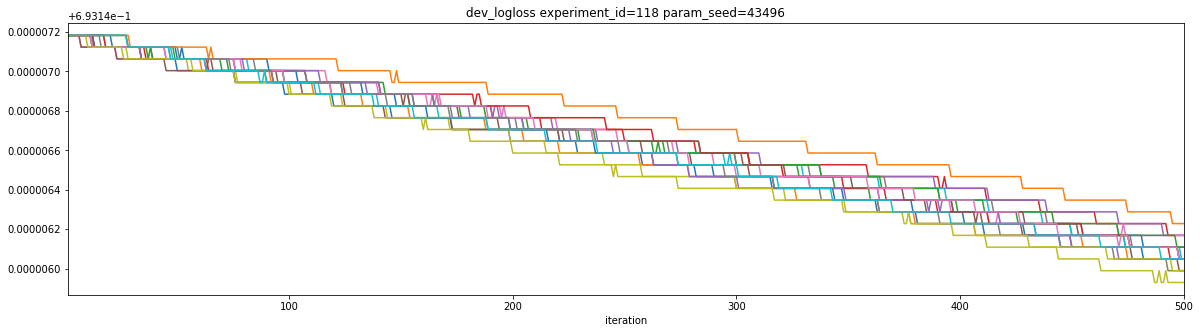

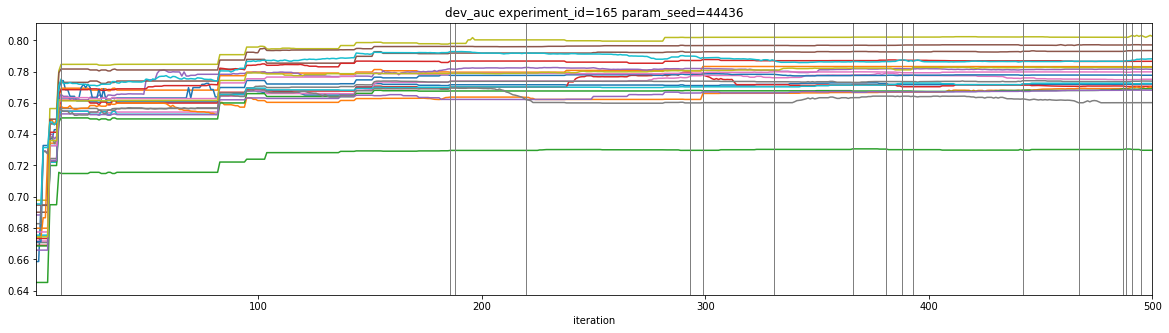

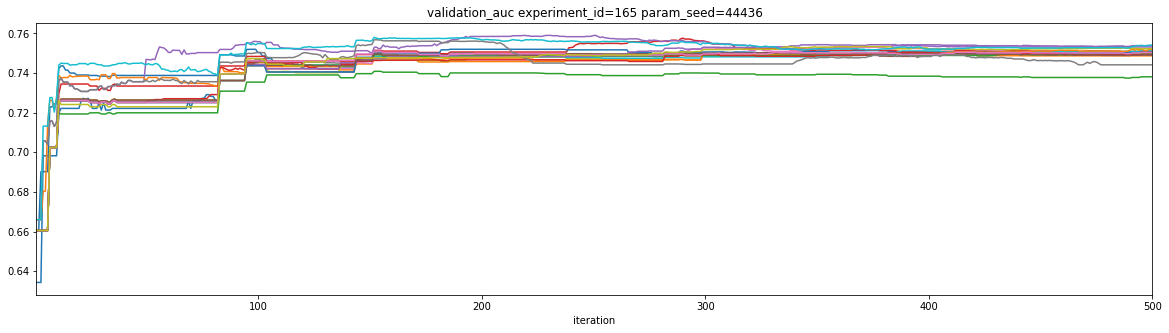

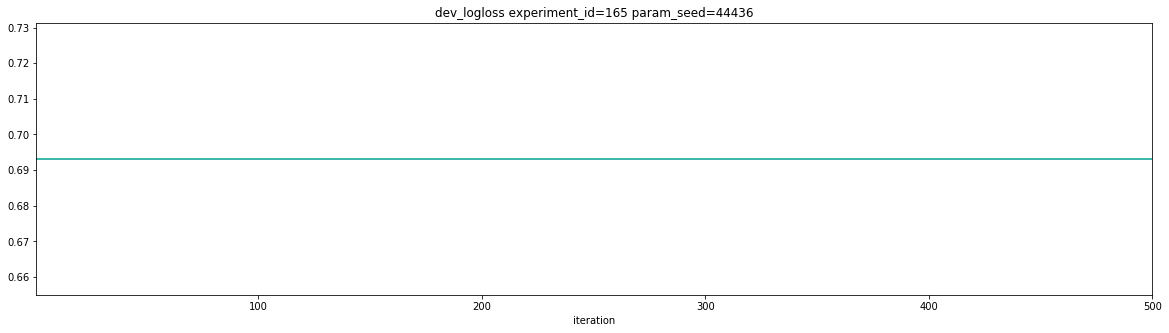

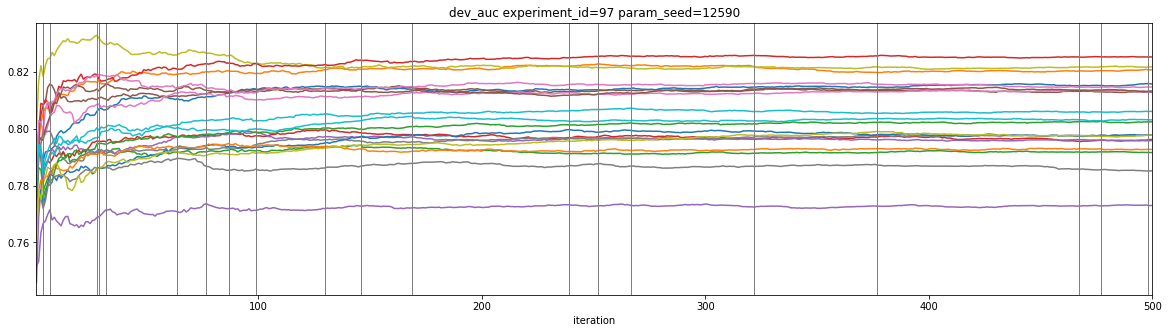

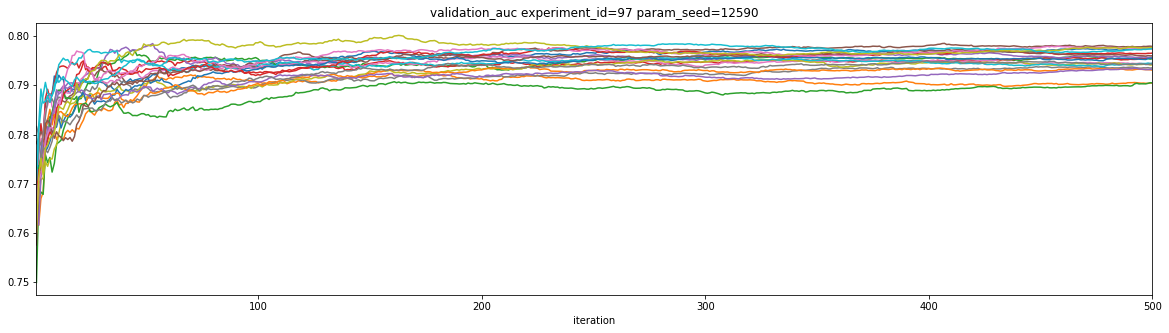

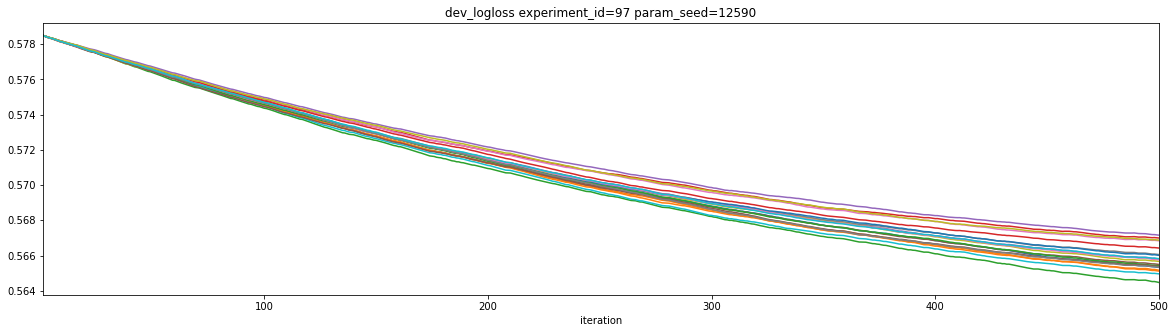

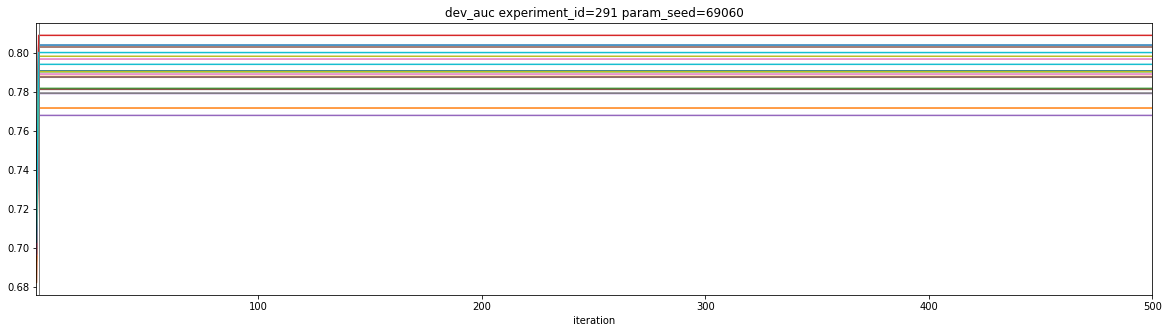

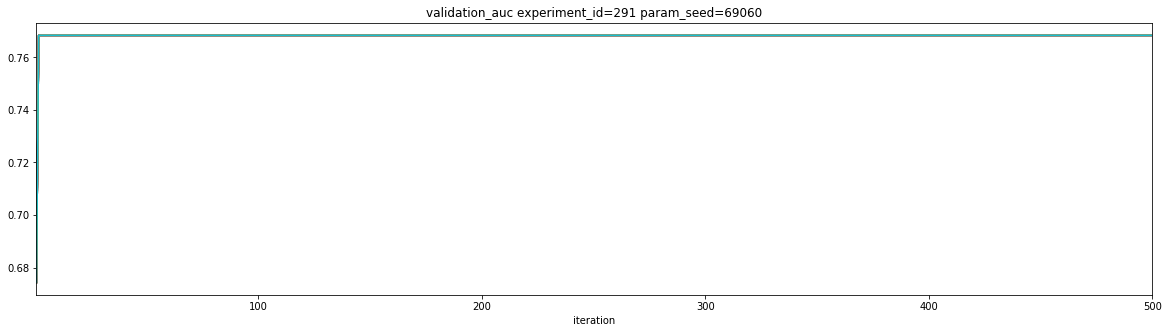

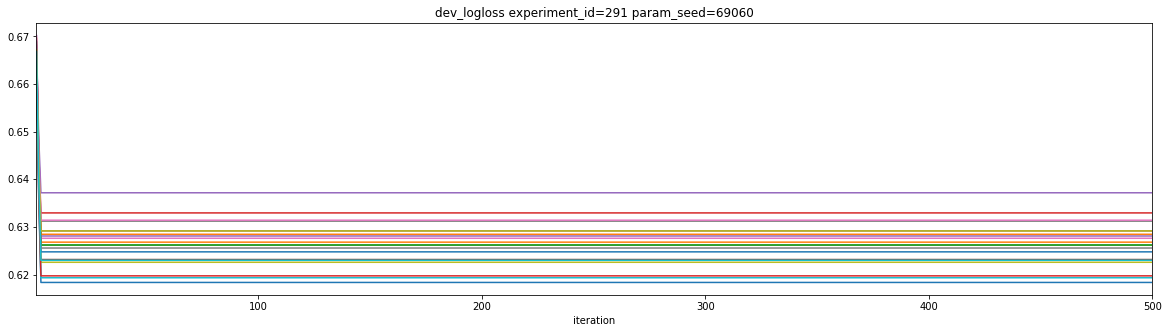

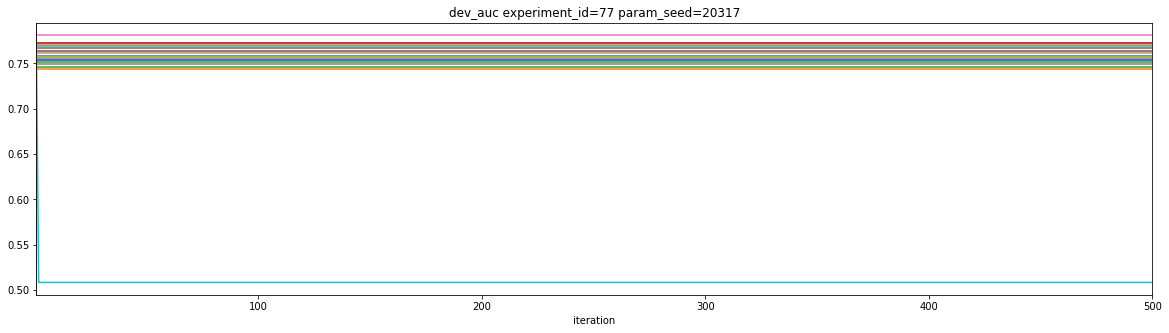

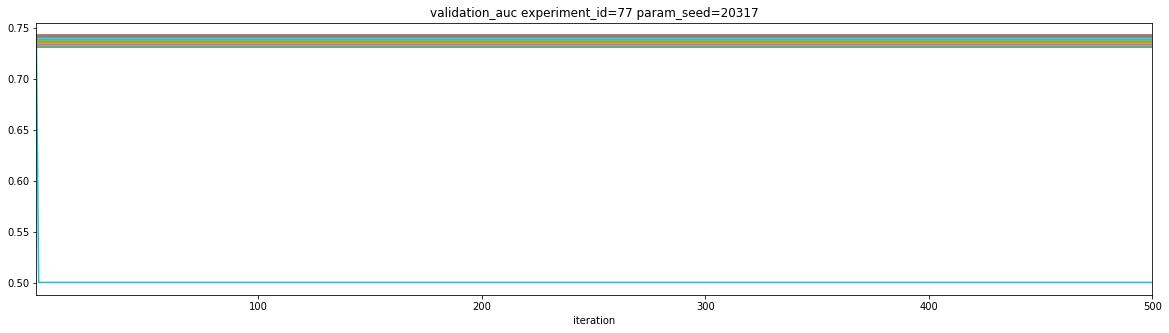

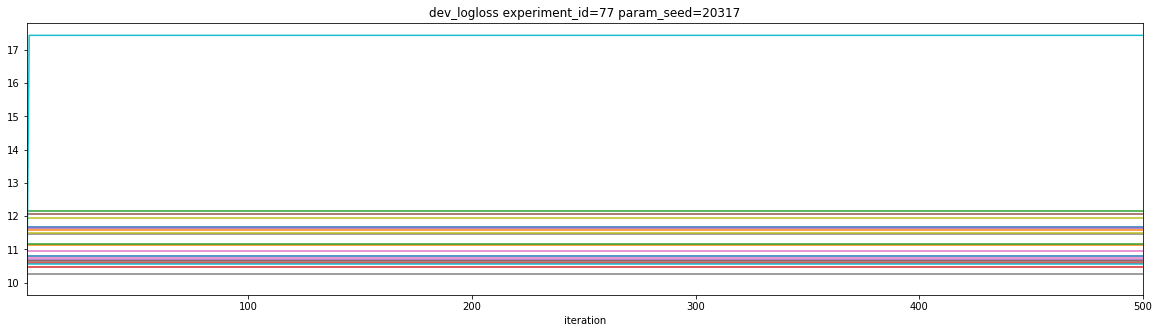

In [12]:
for exp_id, seed in wide_iterations:
    title = f'experiment_id={exp_id} param_seed={seed}'
    experiment = cv_folds[(cv_folds.experiment_id == exp_id) & (cv_folds.param_seed == seed)]
    ax = experiment.pivot(index='iteration', columns='split', values='dev_auc')\
        .plot(title='dev_auc ' + title, legend=False);
    for x in experiment.pivot(index='iteration', columns='split', values='dev_auc').idxmax():
        ax.axvline(x=x, color='gray', linewidth=1)
    experiment.pivot(index='iteration', columns='split', values='validation_auc')\
        .plot(title='validation_auc ' + title, legend=False);
    experiment.pivot(index='iteration', columns='split', values='dev_binary_logloss')\
        .plot(title='dev_logloss ' + title, legend=False);